In [1]:
import pyCloudy as pc
import pyneb
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) #TJ change directory to include the entire ASTRO5160 directory
from Py_files.Basic_analysis import *

In [38]:
def parse_emission_lines(model_name, target_string):
    """
    Parse a file and extract emission line data matching the pattern:
    [Capital letter][optional lowercase letter] space integer (e.g., H 1 or N 5)
    followed by wavelength, flux values, etc.
    
    Args:
        filename (str): Path to the file to parse
        
    Returns:
        list: List of lists, each containing [species, wavelength, flux1, flux2, ...]
    """
    filename = f'{model_name}.out'
    results = []
    iteration_pattern = re.compile(r'Iteration\s+(\d+)\s+of\s+(\d+)')
    final_iteration = False

    with open(filename, 'r') as file:
        
        for i, line in enumerate(file):
            if not final_iteration:
                iteration_match = iteration_pattern.search(line)
                if iteration_match:
                    n, m = iteration_match.groups()
                    if n == m:
                        final_iteration = True
                continue  # Skip processing until we find the iteration line
            # Find all matches of the pattern in the current line
            if target_string in line:
                start = line.index(target_string)
                remaining = line[start + len(target_string):].strip()
                parts = remaining.split()
    
                if len(parts) >= 2:
                    species = target_string.replace(" ", "")  # → "H1"
                    wavelength = parts[0]
                    flux = parts[1]
                    flux_norm = parts[2]
                    if ((type(try_float(flux_norm)) == float) & (type(try_float(flux)) == float) & (type(try_float(wavelength[:-1])) == float)):
                        results.append([species, wavelength, flux, flux_norm, i])

                    
    return results


In [29]:
#Attempt 05/23/2025
def print_output_file(model_name):
    with open(f'{model_name}.out', 'r') as f:
        print(f.read())
    return None

import re

def parse_emission_lines(model_name, target_string):
    """
    Parse a file and extract emission line data matching the pattern:
    [Capital letter][optional lowercase letter] space integer (e.g., H 1 or N 5)
    followed by wavelength, flux values, etc.
    
    Args:
        filename (str): Path to the file to parse
        
    Returns:
        list: List of lists, each containing [species, wavelength, flux1, flux2, ...]
    """
    filename = f'{model_name}.out'
    results = []
    iteration_pattern = re.compile(r'Iteration\s+(\d+)\s+of\s+(\d+)')
    final_iteration = False

    with open(filename, 'r') as file:
        
        for i, line in enumerate(file):
            if not final_iteration:
                iteration_match = iteration_pattern.search(line)
                if iteration_match:
                    n, m = iteration_match.groups()
                    if n == m:
                        final_iteration = True
                continue  # Skip processing until we find the iteration line
            # Find all matches of the pattern in the current line
            if target_string in line:
                start = line.index(target_string)
                remaining = line[start + len(target_string):].strip()
                parts = remaining.split()
    
                if len(parts) >= 2:
                    species = target_string.replace(" ", "")  # → "H1"
                    wavelength = parts[0]
                    flux = parts[1]
                    results.append([species, wavelength, flux, i])

                    
    return results



# Example usage:
# results = parse_emission_lines('your_file.txt')
# for entry in results:
#     print(entry)
    
def write_CLOUDY_input_file():
    input_file = f"{model_name}.in"
    
    with open(input_file, 'w') as f:
        f.write(f'title {model_name}\n')
        f.write(f'Ionization parameter -2\n')
        f.write(f'table SED "fsps_iso.ascii"\n')
        f.write(f'hden 3\n')
        f.write(f'cmb\n')
        f.write('iterate to convergence\n') 
        f.write(f'stop temperature 2 K\n')  # Stop condition
        f.write(f'stop neutral column density [0.1% of total H column]\n')
        f.write('set temperature floor 2.73\n')
        f.write('set nchrg 2\n')
        f.write('normalize to "H  1" 18756.21 angstroms\n')  # Normalization to paschen
        f.write('no level 2 lines\n') # Case B only
        f.write('abundances ism\n')
        f.write('save lines, array "hydrogen_lines.dat" "H 1"\n')
        f.write('grains ISM abundance scaling 1.5\n')
        f.write('save lines, array "052325_trial1.dat" "H  1" no extinction\n')
    return input_file







In [41]:

model_name = '052325_trial1'
cloudy_path = "/d/ret1/Taylor/CLOUDY/c23.01/source/cloudy.exe"

cloudy_input_file = write_CLOUDY_input_file()
os.system(f'{cloudy_path} -r {model_name}')

h1_array = parse_emission_lines(model_name, "H  1")
h1_array


[['H1', '1.68065m', '-21.144', '0.0231', 3234],
 ['H1', '1.64072m', '-21.249', '0.0182', 3235],
 ['H1', '1.61093m', '-21.344', '0.0146', 3236],
 ['H1', '1.58805m', '-21.430', '0.0120', 3237],
 ['H1', '1.57007m', '-21.507', '0.0100', 3238],
 ['H1', '1.55565m', '-21.577', '0.0085', 3239],
 ['H1', '1.54389m', '-21.640', '0.0074', 3240],
 ['H1', '1.53418m', '-21.697', '0.0065', 3241],
 ['H1', '1.52605m', '-21.747', '0.0058', 3242],
 ['H1', '1.51919m', '-21.790', '0.0052', 3243],
 ['H1', '7.45782m', '-20.684', '0.0668', 3245],
 ['H1', '4.65251m', '-20.861', '0.0444', 3246],
 ['H1', '3.73954m', '-21.030', '0.0300', 3247],
 ['H1', '3.29609m', '-21.182', '0.0212', 3248],
 ['H1', '3.03837m', '-21.319', '0.0155', 3249],
 ['H1', '2.87221m', '-21.433', '0.0119', 3250],
 ['H1', '2.75752m', '-21.537', '0.0094', 3251],
 ['H1', '2.67440m', '-21.632', '0.0075', 3252],
 ['H1', '2.61194m', '-21.717', '0.0062', 3253],
 ['H1', '2.56363m', '-21.795', '0.0052', 3254],
 ['H1', '2.52540m', '-21.864', '0.0044',

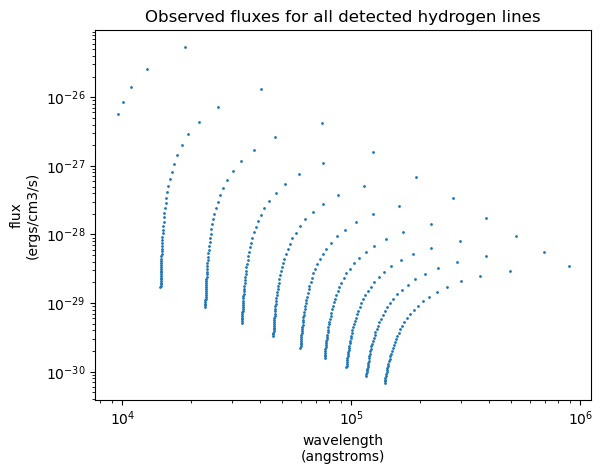

In [26]:
input_file = 'Data_files/intrat.out_1e3_8e3'
lines_output_file = 'Data_files/observed_lines_wavelengths.txt'
obs_fluxes_file = 'Data_files/observed_fluxes.txt'
obs_WL = []
obs_fluxes = []
with open(input_file, 'r') as f_in, open(lines_output_file, 'w') as f_lines_out, open(obs_fluxes_file, 'w') as f_fluxes_out:
    lines = f_in.readlines()[3:]  # Skip the first 3 header lines
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.strip().split()  
            wl_microns = float(parts[0])
            wl_angstroms = wl_microns * 1e4
            obs_WL.append(wl_angstroms)
            flux = float(parts[1])
            obs_fluxes.append(flux)
            f_fluxes_out.write(f'{flux}\n')
            f_lines_out.write(f'H  1 {wl_angstroms:.2f}\n')
plt.scatter(obs_WL, obs_fluxes, s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('flux\n(ergs/cm3/s)')
plt.xlabel('wavelength\n(angstroms)')
plt.title('Observed fluxes for all detected hydrogen lines')
plt.show()


In [2]:
def read_output_file(model_name):
    with open(f'{model_name}.out', 'r') as f:
        print(f.read())
    return None
def write_vary_CLOUDY_input_file():
    input_file = f"{model_name}.in"
    
    with open(input_file, 'w') as f:
        f.write(f'title {model_name}\n')
        f.write(f'Ionization parameter {ionization_param}\n')
        f.write(f'blackbody {temperature} vary\n')
        f.write(f'hden {h_density}\n')
        f.write('optimize lines intrinsic\n')
        
        f.write(f'H  1 0.954861m intensity = {5.615E-27/normalize_to}\n')
        f.write(f'H  1 1.005215m intensity = {8.533E-27/normalize_to}\n')
        f.write(f'H  1 1.094112m intensity = {1.397E-26/normalize_to}\n')
        f.write(f'H  1 1.282163m intensity = {2.544E-26/normalize_to}\n')
        f.write(f'H  1 1.875621m intensity = {5.368E-26/normalize_to}\n')
        
        f.write('end of lines\n')
        f.write('iterate to convergence\n') 
        f.write(f'stop temperature {stop_temp} K\n')  # Stop condition
        f.write(f'stop neutral column density [0.1% of total H column]')

        #stop condition ionizstion frac 10^-3
        #c_input.set_stop(stop_criter=('efrac -3.0','temperature 1'))
        f.write('normalize to "H  1" 18756.21 angstroms\n')  # Normalization to paschen
        f.write('no level 2 lines\n') # Case B only
        f.write('abundances ism\n')
        f.write('grains ism\n')
        f.write('atom H-like levels resolved 50\n')
        f.write('save lines, array "hydrogen_lines.dat" "H 1"\n')
        f.write('save lines list "Simulated_lines.lin" "Data_files/observed_lines_wavelengths.txt" no extinction\n')
        f.write(f'save overview "{model_name}.ovr"\n')
    return input_file


def write_CLOUDY_input_file():
    input_file = f"{model_name}.in"
    
    with open(input_file, 'w') as f:
        f.write(f'title {model_name}\n')
        f.write(f'Ionization parameter {ionization_param}\n')
        f.write(f'blackbody {temperature}\n')
        f.write(f'hden {h_density}\n')

        f.write('iterate to convergence\n') 
        f.write(f'stop temperature {stop_temp} K\n')  # Stop condition
        f.write(f'stop neutral column density [0.1% of total H column]')

        f.write('normalize to "H  1" 18756.21 angstroms\n')  # Normalization to paschen
        f.write('no level 2 lines\n') # Case B only
        f.write('abundances ism\n')
        f.write('atom H-like levels resolved 50\n')
        f.write('save lines, array "hydrogen_lines.dat" "H 1"\n')
        f.write('grains ism\n')
        f.write('save lines list "Simulated_lines.lin" "Data_files/observed_lines_wavelengths.txt" no extinction\n')
        f.write(f'save overview "{model_name}.ovr"\n')
    return input_file
    

In [12]:
input_file = 'Data_files/intrat.out_1e3_8e3'
lines_output_file = 'Data_files/observed_lines_wavelengths.txt'
obs_fluxes_file = 'Data_files/observed_fluxes.txt'
obs_WL = []
obs_fluxes = []
with open(input_file, 'r') as f_in, open(lines_output_file, 'w') as f_lines_out, open(obs_fluxes_file, 'w') as f_fluxes_out:
    lines = f_in.readlines()[3:]  # Skip the first 3 header lines
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.strip().split()  
            wl_microns = float(parts[0])
            wl_angstroms = wl_microns * 1e4
            obs_WL.append(wl_angstroms)
            flux = float(parts[1])
            obs_fluxes.append(flux)
            f_fluxes_out.write(f'{flux}\n')
            f_lines_out.write(f'H  1 {wl_angstroms:.2f}\n')

In [13]:
#Get optimal temp to reproduce fluxes
model_name = 'zCLOUDY_vary_temp'
cloudy_path = "/d/ret1/Taylor/CLOUDY/c23.01/source/cloudy.exe"

#Define model parameters
temperature = 12000
stop_temp = 10
e_density = np.log10(1000) #in n/cm^3
e_temp = 8000 #in kelvin
ionization_param = -2
stop_thickness = '100 pc'
h_density = 3
normalize_to = 5.368E-26



cloudy_input_file = write_vary_CLOUDY_input_file()
os.system(f'{cloudy_path} -r {model_name}')

os.system(f'{cloudy_path} -r optimal')

read_output_file("optimal")
print()





                                                          Cloudy 23.01
                                                         www.nublado.org

                                                  PRNG seed: 0x4c162b8e0ab24969

                       **************************************23Jul25**************************************
                       *                                                                                 *
                       * title zCLOUDY vary temp                                                         *
                       * Ionization parameter -2                                                         *
                       * BLACKbody= 4.079181 LOG                                                         *
                       * hden 3                                                                          *
                       * optimize lines intrinsic                                                        *
                       * 

In [21]:
#Run with set parameters
model_name = 'zCLOUDY_12k_temp'
#Define model parameters
temperature = 12000
stop_temp = 10
e_density = np.log10(1000) #in n/cm^3
e_temp = 8000 #in kelvin
ionization_param = -2
stop_thickness = '100 pc'
h_density = 3
normalize_to = 5.368E-26

cloudy_input_file = write_CLOUDY_input_file()
os.system(f'{cloudy_path} -r {model_name}')

read_output_file(model_name)
print()


                                                          Cloudy 23.01
                                                         www.nublado.org

                                                  PRNG seed: 0x4ed4b01ef9eecb5b

                       **************************************23Jul25**************************************
                       *                                                                                 *
                       * title zCLOUDY 12k temp                                                          *
                       * Ionization parameter -2                                                         *
                       * blackbody 12000                                                                 *
                       * hden 3                                                                          *
                       * iterate to convergence                                                          *
                       * 

In [6]:
print(1.0000*normalize_to)
print(0.4836*normalize_to)
print(0.2634*normalize_to)
print(0.1601*normalize_to)

5.368e-26
2.5959648e-26
1.4139312000000002e-26
8.594167999999999e-27


In [7]:
output_file = 'Simulated_lines.lin'

with open(output_file, 'r') as f:
    lines = f.readlines()
    for line in lines:
        parts = line.strip().split('\t')
        for part in parts:
            print(part)

#lineslist
H  1 9548.61A
H  1 1.00522m
H  1 1.09411m
H  1 1.28216m
H  1 1.87562m
H  1 1.46860m
H  1 1.46902m
H  1 1.46946m
H  1 1.46993m
H  1 1.47043m
H  1 1.47097m
H  1 1.47155m
H  1 1.47217m
H  1 1.47283m
H  1 1.47355m
H  1 1.47432m
H  1 1.47516m
H  1 1.47607m
H  1 1.47705m
H  1 1.47812m
H  1 1.47929m
H  1 1.48057m
H  1 1.48197m
H  1 1.48352m
H  1 1.48522m
H  1 1.48711m
H  1 1.48921m
H  1 1.49155m
H  1 1.49418m
H  1 1.49714m
H  1 1.50050m
H  1 1.50432m
H  1 1.50869m
H  1 1.51374m
H  1 1.51960m
H  1 1.52647m
H  1 1.53460m
H  1 1.54431m
H  1 1.55607m
H  1 1.57050m
H  1 1.58849m
H  1 1.61137m
H  1 1.64117m
H  1 1.68111m
H  1 1.73669m
H  1 1.81791m
H  1 1.94509m
H  1 2.16612m
H  1 2.62587m
H  1 4.05227m
H  1 2.30338m
H  1 2.30440m
H  1 2.30549m
H  1 2.30665m
H  1 2.30789m
H  1 2.30922m
H  1 2.31064m
H  1 2.31217m
H  1 2.31381m
H  1 2.31558m
H  1 2.31749m
H  1 2.31956m
H  1 2.32180m
H  1 2.32423m
H  1 2.32689m
H  1 2.32978m
H  1 2.33296m
H  1 2.33644m
H  1 2.34028m
H  1 2.34453m
H  1 2.34

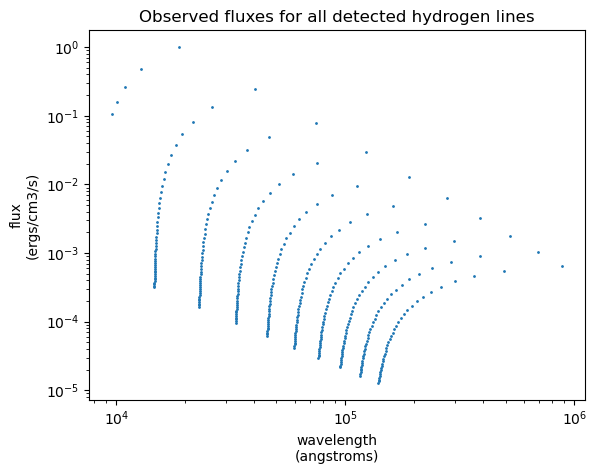

In [27]:
input_file = 'Data_files/intrat.out_1e3_8e3'
lines_output_file = 'Data_files/observed_lines_wavelengths.txt'
obs_fluxes_file = 'Data_files/observed_fluxes.txt'
obs_WL = []
obs_fluxes = []
with open(input_file, 'r') as f_in, open(lines_output_file, 'w') as f_lines_out, open(obs_fluxes_file, 'w') as f_fluxes_out:
    lines = f_in.readlines()[3:]  # Skip the first 3 header lines
    for line in lines:
        if line.strip():  # Skip empty lines
            parts = line.strip().split()  
            wl_microns = float(parts[0])
            wl_angstroms = wl_microns * 1e4
            obs_WL.append(wl_angstroms)
            flux = float(parts[1])
            obs_fluxes.append(flux)
            f_fluxes_out.write(f'{flux}\n')
            f_lines_out.write(f'H  1 {wl_angstroms:.2f}\n')

z = 0.0017
rest_wl = np.array(obs_WL)/(1+z)
rest_wl
norm_fluxes = np.array(obs_fluxes)/obs_fluxes[4]

plt.scatter(rest_wl, norm_fluxes, s=1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('flux\n(ergs/cm3/s)')
plt.xlabel('wavelength\n(angstroms)')
plt.title('Observed fluxes for all detected hydrogen lines')
plt.show()


array([  9532.40491165,  10035.09034641,  10922.55166217,  12799.87022062,
        18724.37855645,  14661.1061196 ,  14665.24907657,  14669.66157532,
        14674.36358191,  14679.38504542,  14684.76589797,  14690.52610562,
        14696.70560048,  14703.35429769,  14710.51212938,  14718.22901068,
        14726.5748228 ,  14735.61944694,  14745.44274733,  14756.13457123,
        14767.80473196,  14780.56304283,  14794.56923231,  14809.98302885,
        14826.99411001,  14845.84206848,  14866.80642907,  14890.2066487 ,
        14916.45203155,  14946.021763  ,  14979.50484177,  15017.62004592,
        15061.29579714,  15111.67016073,  15170.21064191,  15238.80403314,
        15319.94609164,  15416.93121693,  15534.2917041 ,  15678.30687831,
        15857.93151642,  16086.37316562,  16383.82749326,  16782.58959768,
        17337.38644305,  18148.23799541,  19417.86962164,  21624.44843766,
        26214.12598582,  40453.89837277,  22994.74892682,  23004.93161625,
        23015.79315164,  

In [15]:
##Testing for Daniella
def extract_flux(file_path, target_wl):
    fluxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if target_wl in parts:
                # Once you find the wavelength, decide which column has the flux
                # Assuming flux is the number *immediately following* the target
                index = parts.index(target_wl)
                try:
                    flux = float(parts[index + 2])
                    fluxes.append(flux)
                except (IndexError, ValueError):
                    raise ValueError(f"Flux value could not be read after {target_wl} in {file_path}")
        return np.mean(fluxes)
    raise ValueError(f"Wavelength {target_wl} not found in {file_path}")
def write_CLOUDY_input_file(temperature, ion):
    input_file = f"{model_name}.in"
    
    with open(input_file, 'w') as f:
        f.write(f'title {model_name}\n')
        f.write(f'Ionization parameter {ion}\n')
        f.write(f'blackbody {temperature}\n')
        f.write(f'hden {h_density}\n')
        f.write('iterate to convergence\n') 
        f.write(f'stop temperature {stop_temp} K\n')  # Stop condition
        f.write(f'stop neutral column density [0.1% of total H column]')

        f.write('normalize to "H  1" 18756.21 angstroms\n')  # Normalization to paschen
        f.write('no level 2 lines\n') # Case B only
        f.write('abundances ism\n')
        f.write('atom H-like levels resolved 50\n')
        f.write(f'save lines, array "{model_name}.dat" "H 1"\n')
        f.write('grains ism\n')
        #f.write(f'save lines list "{model_name}_sim_lines.lin" "{model_name}_ratio.txt" no extinction\n')
        f.write(f'save overview "{model_name}.ovr"\n')
    return input_file
    

In [17]:

for temperature in np.linspace(8000, 10000, 3):
    for ion_par in np.linspace(-3,-2, 3):
        
            
        model_name = f'Daniella_test_t{int(np.round(temperature/1000))}_i{int(np.round(ion_par*10))}'
        cloudy_path = "/d/ret1/Taylor/CLOUDY/c23.01/source/cloudy.exe"
        
        #Define model parameters
        stop_temp = 10
        e_density = np.log10(10000) #in n/cm^3
        e_temp = 10000 #in kelvin
        stop_thickness = '100 pc'
        h_density = 3
        normalize_to = 5.368E-26

        
        
        
        cloudy_input_file = write_CLOUDY_input_file(temperature,ion_par)
        os.system(f'{cloudy_path} -r {model_name}')
        
        print(f"{temperature, ion_par}")

(8000.0, -3.0)
(8000.0, -2.5)
(8000.0, -2.0)
(9000.0, -3.0)
(9000.0, -2.5)
(9000.0, -2.0)
(10000.0, -3.0)
(10000.0, -2.5)
(10000.0, -2.0)


In [16]:
wl = '1.87510m'
files = glob.glob('Dan*.out')
print(files)
for fil in files:
    print(fil, 1/extract_flux(fil, wl))

['Daniella_test_t8.out', 'Daniella_test_t9_i-30.out', 'Daniella_test_t9_i-20.out', 'Daniella_test_t10_i-20.out', 'Daniella_test_t10.out', 'Daniella_test_t12.out', 'Daniella_test_t14.out', 'Daniella_test_t8_i-30.out', 'Daniella_test_t8_i-25.out', 'Daniella_test_t8_i-20.out', 'Daniella_test_t9_i-25.out', 'Daniella_test_t10_i-30.out', 'Daniella_test_t10_i-25.out']
Daniella_test_t8.out 7.902015013828528
Daniella_test_t9_i-30.out 6.984459577440197
Daniella_test_t9_i-20.out 7.021239248727399
Daniella_test_t10_i-20.out 6.349206349206349
Daniella_test_t10.out 6.349206349206349
Daniella_test_t12.out 5.420788724759453
Daniella_test_t14.out 4.814636494944632
Daniella_test_t8_i-30.out 7.858546168958743
Daniella_test_t8_i-25.out 7.886435331230284
Daniella_test_t8_i-20.out 7.902015013828528
Daniella_test_t9_i-25.out 7.010164738871364
Daniella_test_t10_i-30.out 6.3191153238546605
Daniella_test_t10_i-25.out 6.341154090044387


In [ ]:
def write_CLOUDY_input_file():
    input_file = f"{model_name}.in"
    
    with open(input_file, 'w') as f:
        f.write(f'title {model_name}\n')
        f.write(f'Ionization parameter \n')
        f.write(f'blackbody {temperature}\n')
        f.write(f'hden {h_density}\n')
        f.write('iterate to convergence\n') 
        f.write(f'stop temperature {stop_temp} K\n')  # Stop condition
        f.write(f'stop neutral column density [0.1% of total H column]')

        f.write('normalize to "H  1" 18756.21 angstroms\n')  # Normalization to paschen
        f.write('no level 2 lines\n') # Case B only
        f.write('abundances ism\n')
        f.write('atom H-like levels resolved 50\n')
        f.write(f'save lines, array "{model_name}.dat" "H 1"\n')
        f.write('grains ism\n')
        #f.write(f'save lines list "{model_name}_sim_lines.lin" "{model_name}_ratio.txt" no extinction\n')
        f.write(f'save overview "{model_name}.ovr"\n')
    return input_file

model_name = f'Daniella_test_t{int(np.round(temperature/1000))}_i{int(np.round(ion_par*10))}'
cloudy_path = "/d/ret1/Taylor/CLOUDY/c23.01/source/cloudy.exe"

#Define model parameters
stop_temp = 10
e_density = np.log10(10000) #in n/cm^3
e_temp = 10000 #in kelvin
stop_thickness = '100 pc'
h_density = 3
normalize_to = 5.368E-26




cloudy_input_file = write_CLOUDY_input_file(temperature,ion_par)
os.system(f'{cloudy_path} -r {model_name}')

print(f"{temperature, ion_par}")